# k-NN и некоторые виды расстояний (Игрушечный пример)

In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import io
from scipy.spatial import distance

Считаем тренировочный набор данных

In [2]:
data = '''id,X,Y,Class
1,28,10,1
2,49,49,1
3,48,35,0
4,20,25,1
5,45,53,0
6,36,10,0
7,62,40,0
8,13,47,1
9,40,56,0
10,16,45,0
11,10,17,1
12,20,15,1
'''
df = pd.read_csv(io.StringIO(data), index_col='id')
df

,X,Y,Class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,20,25,1
5,45,53,0
6,36,10,0
7,62,40,0
8,13,47,1
9,40,56,0


**Важно:** Здесь, поскольку мы имеем дело с синтететическими данными и рассматриваем учебный пример, в угоду простоты восприятия масштабировать признаки не будем.

Зададим сразу и тестовый объект. Напомним, что алгоритм k-NN — это «ленивый» алгоритм, он учится в процессе предсказания.

In [ ]:
NewObject = np.array([33, 36])

Визуализируем наши тренировочные данные, а также тестовый объект, и попробуем его классифицировать в зависимости от того, какое расстояние измерять.

(0.0, 80.0)

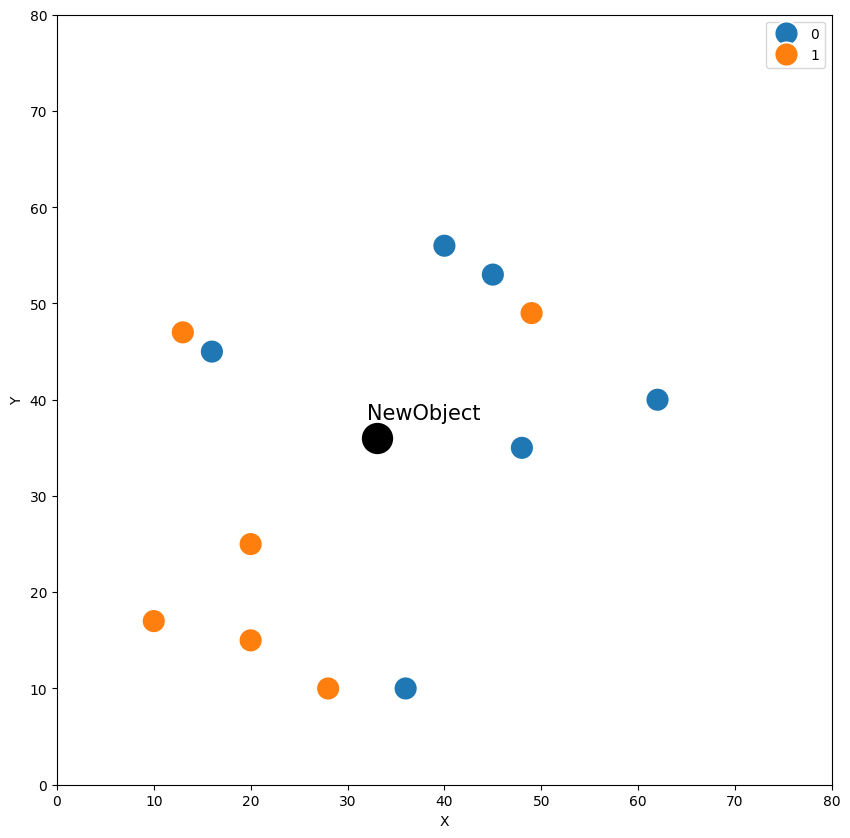

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)
plt.xlim(0, 80)
plt.ylim(0, 80)

Вычислим стандартные (евклидовы) расстояния от тестового объекта до всех остальных.

In [ ]:
p = 2
df['Distance'] = [distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Distance
id,,,,
1,28,10,1,26.476405
2,49,49,1,20.615528
3,48,35,0,15.033296
4,20,25,1,17.029386
5,45,53,0,20.808652
6,36,10,0,26.172505
7,62,40,0,29.274562
8,13,47,1,22.825424
9,40,56,0,21.189620


Найдем k ближайших соседей для k = 3.

In [ ]:
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
3,48,35,0,15.033296
4,20,25,1,17.029386
10,16,45,0,19.235384


Визуализируем результат.

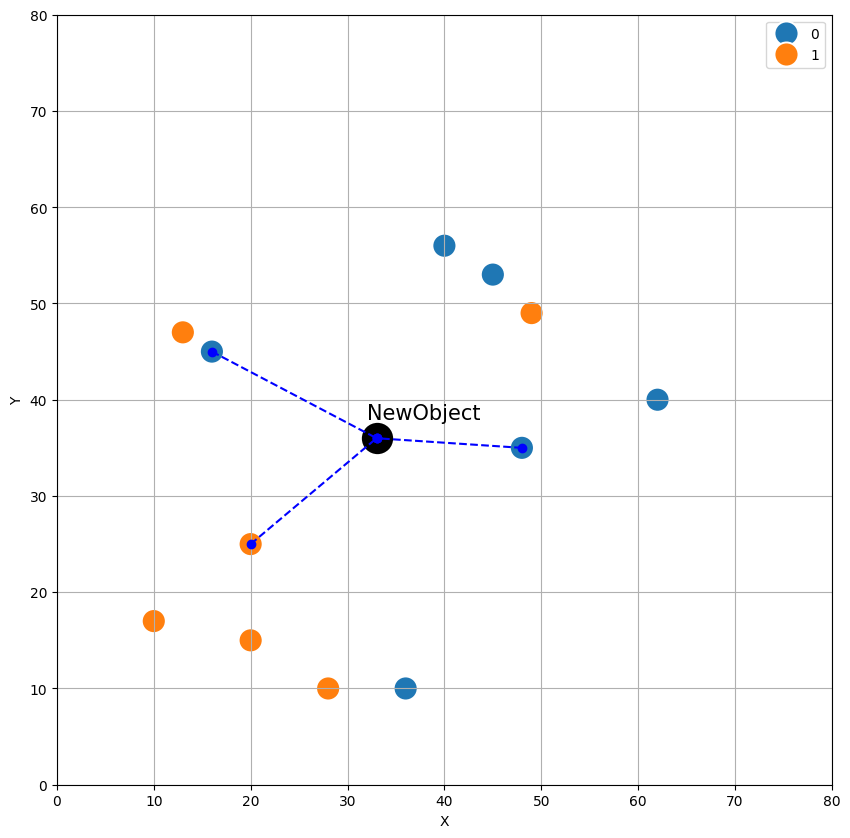

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
plt.xlim(0, 80)
plt.ylim(0, 80)
for i, item in df.loc[ids].iterrows():
  x_values = [item['X'], NewObject[0]]
  y_values = [item['Y'], NewObject[1]]
  plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

Для классификации будут использоваться те объекты, которые попадают в соответствующую окрестность (в «круг»).

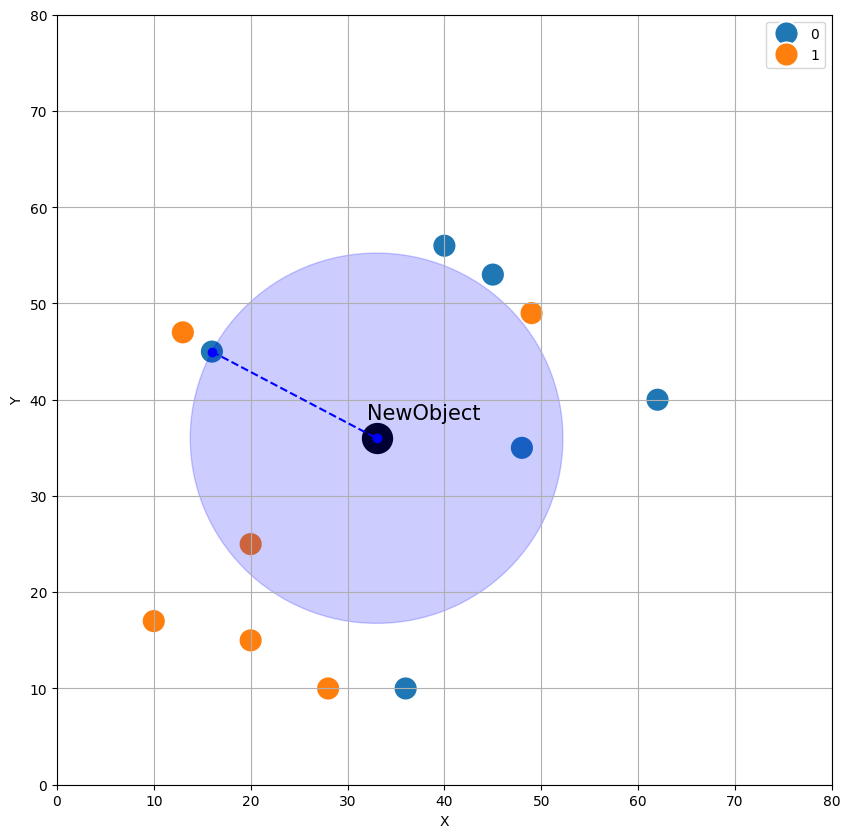

In [ ]:
from matplotlib.patches import Circle
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
circle1 = plt.Circle((NewObject[0], NewObject[1]), dists[k-1], color='b', alpha=0.2)
plt.gca().add_patch(circle1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

А что получится, если использовать манхэттенское расстояние?

In [ ]:
p = 1
df['Distance'] = [distance.minkowski(obj, NewObject, p=p) for index, obj in df.iloc[:,:2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
3,48,35,0,16.0
4,20,25,1,24.0
10,16,45,0,26.0


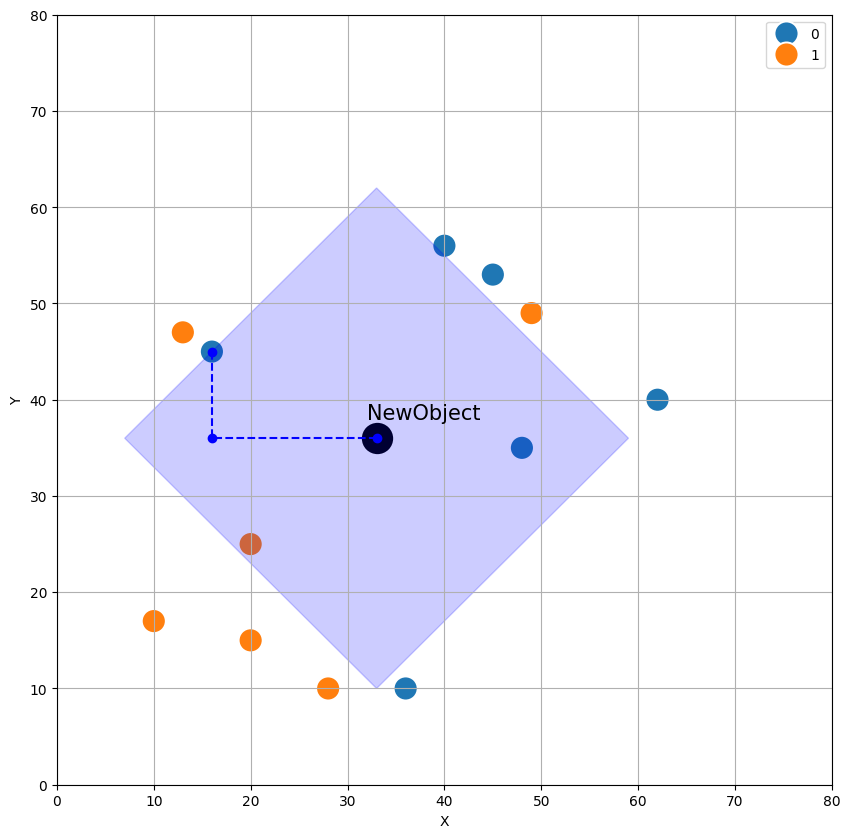

In [ ]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]], [NewObject[0], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext = (NewObject[0]-1, NewObject[1]+2), fontsize=15)

polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], NewObject[1], NewObject[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

А если использовать расстояние Чебышёва?

In [ ]:
df['Distance'] = [distance.chebyshev(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
def neighbors(k):
  return list(df.sort_values(by='Distance').head(k).index), list(df.sort_values(by='Distance').head(k).Distance)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Distance
id,,,,
4,20,25,1,13
3,48,35,0,15
2,49,49,1,16


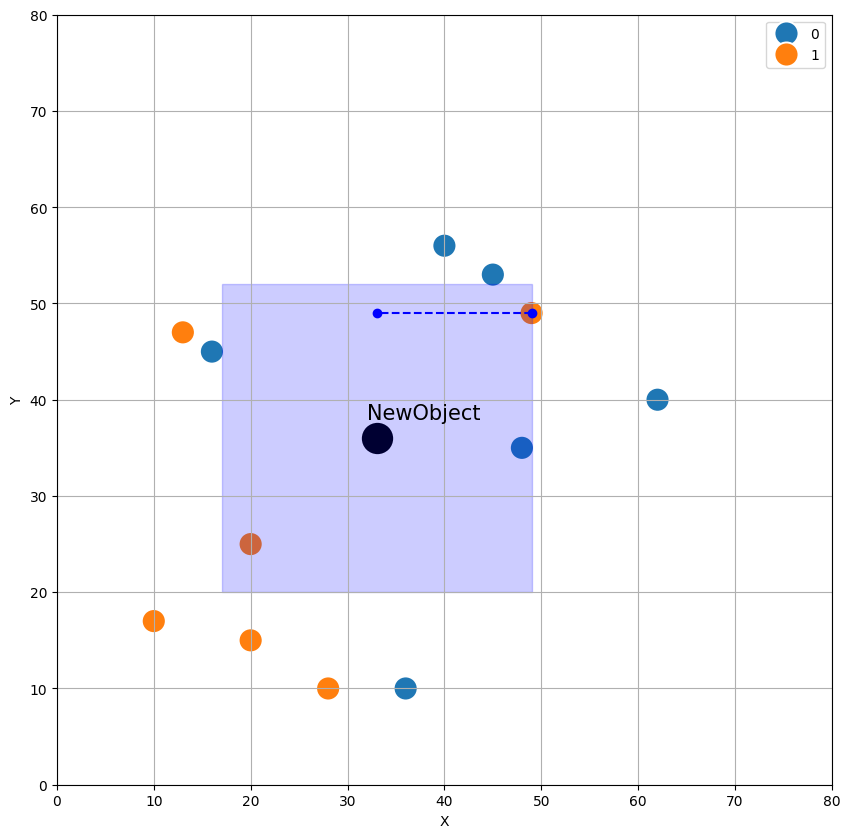

In [ ]:
from matplotlib.patches import Polygon
polygon_dots = np.array([[NewObject[0]+dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]+dists[k-1]], [NewObject[0]-dists[k-1], NewObject[1]-dists[k-1]], [NewObject[0]+dists[k-1], NewObject[1]-dists[k-1]]])
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=df.X, y=df.Y, hue=df.Class, s=300)
sns.scatterplot(x=[NewObject[0]], y=[NewObject[1]], marker='o', s=600, color='black')
plt.annotate('NewObject', (NewObject[0], NewObject[1]), xytext=(NewObject[0]-1, NewObject[1]+2), fontsize=15)
polygon1 = plt.Polygon(polygon_dots, color='b', alpha=0.2)
plt.gca().add_patch(polygon1)
plt.xlim(0, 80)
plt.ylim(0, 80)
x_values = [df.loc[ids[k-1]]['X'], NewObject[0]]
y_values = [df.loc[ids[k-1]]['Y'], df.loc[ids[k-1]]['Y']]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.grid(True)

# k-NN Классификация

## Библиотечная реализация

В качестве набора данных рассмотрим [следующий датасет.](https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv)

Он представляет собой демографические данные жителей пустыни Калахари (охотники-собиратели), собранные Нэнси Хауэлл в Ботсване в период с августа 1967 по май 1969 года.

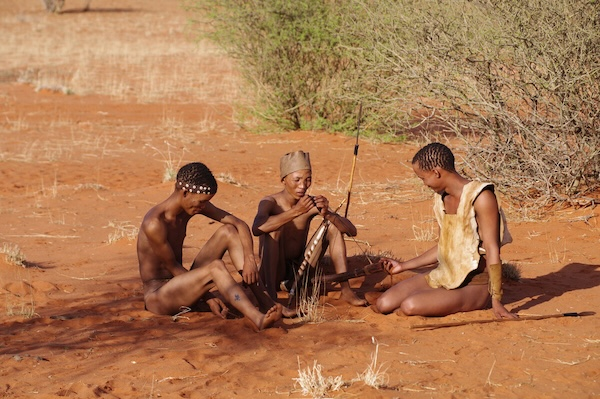

In [5]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


Соберем выборку более ли менее «стандартных» людей:

In [6]:
df_sample = df[(df['age'] >= 18) & (df['age'] <= 50)]
df_sample.head()

,height,weight,age,male
3,156.845,53.041914,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


Визуализируем то, что у нас получилось:

In [7]:
import matplotlib.pyplot as plt

def plot(df):
    plt.figure(figsize=(12,8))
    plt.scatter(df.weight[df.male == 1], df.height[df.male == 1], color='blue', label='male')
    plt.scatter(df.weight[df.male == 0], df.height[df.male == 0], color='red', label='female')
    plt.legend()
    plt.ylabel('рост')
    plt.xlabel('масса')

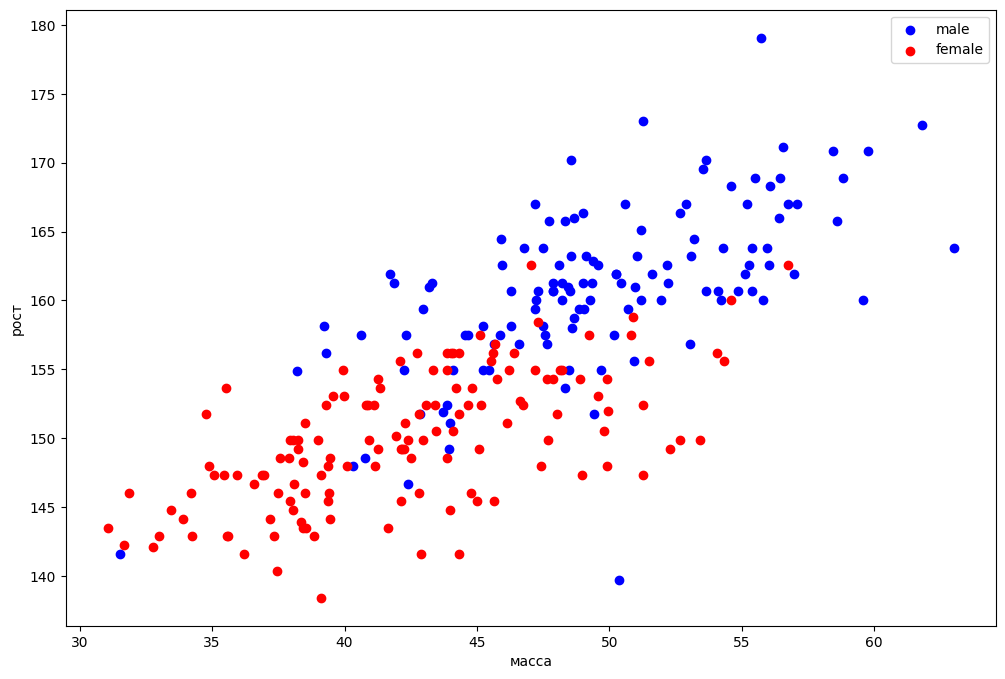

In [8]:
plot(df_sample)

Разделим выборку на тренировочную и тестовую части, возраст учитывать не будем.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sample[['weight', 'height']], df_sample['male'], test_size=0.2, random_state=1)

k-NN — метрический классификатор, следовательно необходимо нормировать признаки, например, используем `StandardScaler`.

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

Построение модели

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Оценка

In [24]:
from sklearn.metrics import f1_score

y_pred = knn.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.7916666666666666

Можно смотреть и на вероятности отнесения объектов к тому или иному классу. В данном случае вероятности вычисляются на основе частоты:

In [16]:
knn.predict_proba(X_test_scaled[:5])

array([[0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2]])

Можно проводить и чуть боле глубокую аналитику. Вычислим расстояния до ближайших объектов и индексы самих объектов:

In [17]:
neighbors_dist, neighbors_idx = knn.kneighbors(X_test_scaled[:1])
print(neighbors_dist)
print(neighbors_idx)

[[0.08661201 0.15146489 0.18985809 0.20637946 0.22959583]]
[[ 60  55 106 188 104]]


Посмотрим, как это будет выглядеть на плоскости

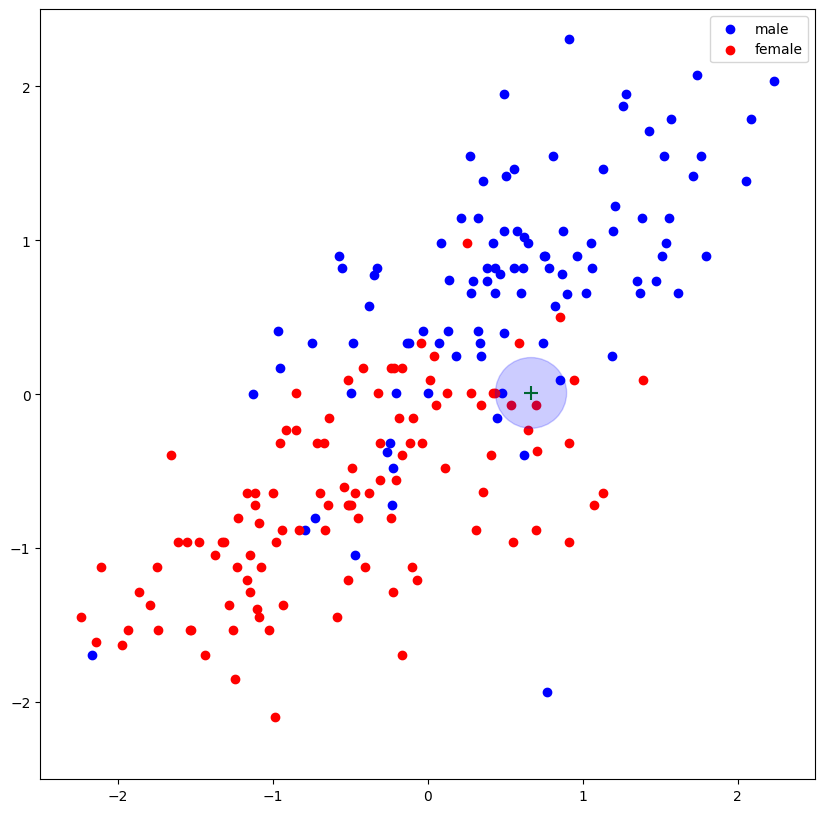

In [18]:
x_trian_for_plot = pd.DataFrame(X_train_scaled, columns = X_train.columns)
x_trian_for_plot['male'] = list(y_train)
dists, ids = knn.kneighbors([X_test_scaled[0]])
plt.figure(figsize=(10,10))
plt.scatter(x_trian_for_plot.weight[x_trian_for_plot.male == 1], x_trian_for_plot.height[x_trian_for_plot.male == 1], color='blue', label='male')
plt.scatter(x_trian_for_plot.weight[x_trian_for_plot.male == 0], x_trian_for_plot.height[x_trian_for_plot.male == 0], color='red', label='female')
plt.scatter(X_test_scaled[0][0], X_test_scaled[0][1], marker='+', color='green', s=100)
circle1 = plt.Circle((X_test_scaled[0][0],X_test_scaled[0][1]), dists[0][-1], color='b', alpha=0.2)
plt.gca().add_patch(circle1)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.legend()

Визуализируем результаты на плоскости в исходных координатах

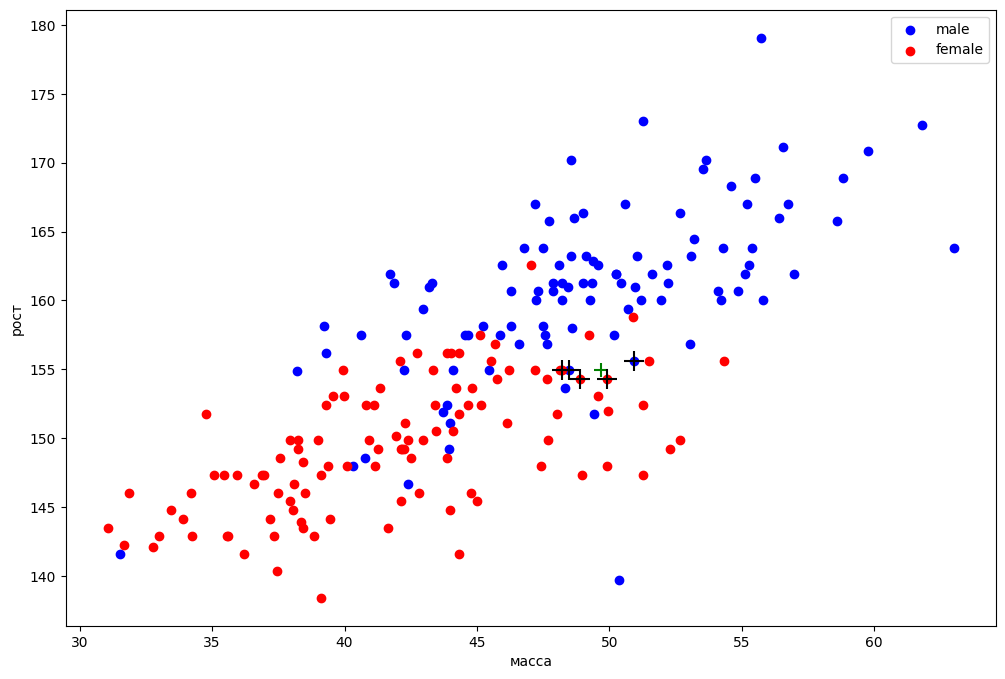

In [19]:
plot(df_sample.loc[X_train.index])
plt.scatter(X_test.iloc[0].weight, X_test.iloc[0].height, marker='+', color='green', s=100)
plt.scatter(X_train.iloc[neighbors_idx[0]].weight, X_train.iloc[neighbors_idx[0]].height, marker='+', color='black', s=200)

А почему мы выбрали $k = 5$? Почему не $7$?

In [25]:
knn_5 = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn_7 = KNeighborsClassifier(n_neighbors = 7, p = 2)
print(f'f1_score for k = 5: {f1_score(y_test, knn_5.fit(X_train_scaled, y_train).predict(X_test_scaled))}')
print(f'f1_score for k = 7: {f1_score(y_test, knn_7.fit(X_train_scaled, y_train).predict(X_test_scaled))}')

f1_score for k = 5: 0.7916666666666666
f1_score for k = 7: 0.8333333333333334


Можно попытаться подобрать параметры на кросс-валидации

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
import numpy as np

parameter_grid = {
    'n_neighbors': np.arange(2, 10, 1),
    'p': [1, 2, 3]
}
grid_searcher = GridSearchCV(estimator=KNeighborsClassifier(),
                             param_grid=parameter_grid,
                             cv=5,
                             scoring='f1',
                             n_jobs=-1
                            )

In [28]:
%%time
grid_searcher.fit(X_train_scaled, y_train)

CPU times: user 70.4 ms, sys: 73.1 ms, total: 144 ms
Wall time: 1.74 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2, 3]},
             scoring='f1')

In [29]:
grid_searcher.best_params_

{'n_neighbors': np.int64(9), 'p': 1}

In [30]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(grid_searcher.best_estimator_, X_train_scaled, y_train, scoring = 'f1', cv = 5)
print(cv_score)
print(cv_score.mean())

[0.84210526 0.82051282 0.88888889 0.84210526 0.91891892]
0.8625062309272836


In [31]:
grid_searcher.best_score_

np.float64(0.8625062309272836)

In [32]:
print(f'f1 for best: {f1_score(y_test, grid_searcher.best_estimator_.predict(X_test_scaled))}')

f1 for best: 0.8163265306122449


## Реализация с нуля

### Обычный k-NN

Произведем реализацию метода k-NN с нуля. Для этого опишем класс `MyKNN`, расширяя который, постепенно будем добавлять функционал.

**Примечание**: для простоты реализации зафиксируем нечетность числа соседей.

In [33]:
from scipy.spatial import distance_matrix

class MyKNN_v_0():

  def __init__(self, k=5, p=2):
    '''
    Параметры
    ----------
    k: -- число ближайших соседей
    p: -- параметр в расстоянии Минковского
    '''
    self.k = k
    self.p = p

  def fit(self, X, y):
    '''
    Метод "обучения" модели. Как такового подбора параметров не происходит,
    поэтому лишь фиксируются обучающие данные.

    Примечание:
    -------------
    Впоследствии используется работа с индексами откликов,
    поэтому индексация в векторе откликов должна идти по порядку, начиная с нуля.
    В этом случае работа с pd.DataFrame или pd.Series может быть некорректной.
    Рекомендуется предварительно конвертировать вектор откликов в numpy.ndarray.

    Параметры
    ----------
    X: {array-like} формы (n_samples, n_features)
      Матрица объекты/признаки, где `n_samples` — число объектов
      и `n_features` — число признаков.
    y : {numpy.ndarray} длины `n_samples`
      Вектор откликов
    '''
    self.X_train = X
    self.y_train = y
    return self


# Преобразуем вектор откликов к numpy.ndarray
#---------------------#
y_train = np.array(y_train)
#---------------------#

Для расширения функционала нашего класса будем наследоваться от предыдущих версий. Реализуйте метод `calulate_distances` для вычисления расстояний от всех тестовых объектов до всех тренировочных объектов.

Напомним, что расстояние Минковского для $x,y \in \mathbb{R}^n$ определяется как

$$
\rho (x,y) = \left(\sum_{i=1}^n |x_i - y_i|^{p}\right)^{1/p}.
$$

В частности при $p=1$ имеем расстояние городских кварталов, при $p=2$ — евклидово расстояние.

In [40]:
class MyKNN_v_1(MyKNN_v_0):

  def calulate_distances(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.
    self.p : параметр в расстоянии Минковского

    Что возвращается
    -------
    distance_matrix : матрициа формы (len(X), len(X_train))
                      матрица расстояний между объектами X и X_train

    """

    return distance_matrix(X, self.X_train, self.p)


knnnn = MyKNN_v_1(k=5, p=2).fit(X_train_scaled, y_train)

assert np.isclose(knnnn.calulate_distances(X_test_scaled[:2])[:,:5], np.array([[1.41727685, 1.56955085, 2.28537439, 1.78599031, 1.22062035], [2.77759549, 1.06621873, 0.74262209, 0.23629922, 2.38340469]])).all()


Определим непосредственно ближайших соседей для тестовых данных. Реализуйте метод `kneighbors`, который возвращает матрицу расстояний от всех тестовых данных до своих ближайших соседей (по возрастанию близости) и соответствующую матрицу индексов этих ближайших соседей.

In [66]:
class MyKNN_v_2(MyKNN_v_1):

  def kneighbors(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.

    Что возвращается
    -------
    (neigh_dist_arr, neigh_ind_arr),

    где

    neigh_dist_arr : матрициа формы (n_samples, k)
                     матрица расстояний между объектами X и
                     их k ближайшими соседями (в порядке близости).
    neigh_ind_arr :  матрициа формы (n_samples, k)
                     матрица индексов ближайших k соседей объектов X
                     (в порядке близости)
    """
    distances = self.calulate_distances(X)
    sorted_indices = np.argsort(distances, axis=1)
    neigh_ind_arr = sorted_indices[:, :self.k]
    neigh_dist_arr = np.take_along_axis(distances, neigh_ind_arr, axis=1)

    # neigh_dist_arr = np.sort(self.calulate_distances(X))[:, :self.k]
    # neigh_ind_arr = np.argsort(neigh_dist_arr)


    return neigh_dist_arr, neigh_ind_arr

knnnn = MyKNN_v_2(k=5, p=2).fit(X_train_scaled, y_train)

assert np.isclose(knnnn.kneighbors(X_test_scaled[:2])[0], np.array([[0.08661201, 0.15146489, 0.18985809, 0.20637946, 0.22959583],[0.05298365, 0.09244432, 0.09671431, 0.16187976, 0.17027281]])).all()
assert np.isclose(knnnn.kneighbors(X_test_scaled[:2])[1], np.array([[ 60,  55, 106, 188, 104], [157, 140, 103,  90, 202]])).all()

Когда определены соседи тестовых наблюдений, можно предсказывать класс. Реализуйте метод `predict`, который определяет класс тестового наблюдением на основе простого большинства меток классов его ближайших соседей.

In [ ]:
from statistics import mode

class MyKNN_v_3(MyKNN_v_2):

  def predict(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.

    Что возвращается
    -------
    predictions : вектор предсказаний
    """
    neigh_dist_arr, neigh_ind_arr = self.kneighbors(X)
    nearest_labels = self.y_train[neigh_ind_arr]
    predictions = np.array([mode(labels) for labels in nearest_labels])
    return predictions


knnnn = MyKNN_v_3(k=5, p=2).fit(X_train_scaled, y_train)

assert np.isclose(f1_score(y_test, knnnn.predict(X_test_scaled)), 0.7916666666666666)

### Взвешенный k-NN

До этого мы предполагали, что ближайшие соседи имеют одинаковый "вес" при определении класса тестового наблюдения. Имеет смысл рассмотреть и другой подход, так называемый "взвешенный" k-NN.

Алгоритм взвешенного k-NN может быть формально записан, например, так. Пусть имеется  тренировочный набор данных $X=\left(x_{1}, \ldots, x_{n}\right)$ объема $n$,

$$
x_i = (x_{i1}, x_{i2}, ..., x_{ip}), \quad i \in \{1, 2, ..., n \},
$$

причем каждому объекту $x_i$ соответствует отклик $y_i \in Y$, а на $p$-мерном множестве объектов задана метрика $d$.

1. Для нового объекта $z$ вычислить расстояния $d(z, x_i)$ до каждого объекта $x_i$, а также веса
$$
\omega_i = \omega_i(x_i, z), \quad i \in \{1, 2, \ldots ,n\}
$$

2. Элементы тренировочного набора данных расположить в порядке неубывания расстояний до $z$:
$$
d(z, x_1^{(z)}) \leq d(z, x_2^{(z)}) \leq ... \leq d(z, x_n^{(z)}),
$$
где $x_1^{(z)} = x_{t_1}$, а $t_1$ -- любое из решений задачи $\underset{{i \in \{1, 2, ..., n\}}}{\operatorname{Argmin}} d(z, x_i)$, $x_2^{(z)} = x_{t_2}$, а $t_2$ -- любое из решений задачи $\underset{{i \in \{1, 2, ..., n\} \setminus \{t_1\}}}{\operatorname{Argmin}} d(z, x_i)$, и так далее.
3. Отклики и веса перенумеровать согласно пункту 2:
	$$
	y_i^{(z)} = y_{t_i}, \quad  \omega_i^{(z)} = \omega_{t_i}, \quad i \in \{1, 2, ..., n\}.
	$$
4. Среди ближайших $k$ соседей найти такой класс $y \in Y$, который имеет наибольший вес (в случае, если классов несколько -- выбрать  любой):
$$
a \left (z, k \right ) = \underset{y \in Y}{\operatorname{Argmax}} \sum_{i=1}^{k} \mathsf{I} \left (y_i^{(z)} = y \right )\omega_i^{(z)}.
$$

Один из способов задания весов основан на близости тестового объекта по отношению к другим. Идея способа проста: чем меньше расстояние от тренировочного объекта до тестового, тем более значимым при классификации является тренировочный объект. Даже точнее, тем более значим голос этого тренировочного объекта, или тем более значима метка его класса. Например, в качестве веса $w_i$ можно взять величину, обратно пропорциональную расстоянию между объектами $x_i$ и $z$, то есть
$$
\omega_i = \omega_i(x_i, z) = \frac{1}{d(x_i,z)}.
$$
Таким образом, выбранные веса увеличивают значимость ближайших объектов, и уменьшают значимость более дальних объектов.

Опишите метод `predict_weighted`, реализующий взвешенный k-NN, где веса обратно пропорциональны расстояниям.

In [ ]:
class MyKNN_v_4(MyKNN_v_3):

  def predict_weighted(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.

    Что возвращается
    -------
    (predictions, probs),

    где

    predictions : вектор предсказаний
                  матрица расстояний между объектами X и
                  их k ближайшими соседями (в порядке близости).
    probs :  матрициа формы (n_samples, 2)
             матрица вероятностей отнесения объектов к каждому классу,
             где вероятности вычисляются на основе весов ближайших объектов
    """
    neigh_dist_arr, neigh_ind_arr = self.kneighbors(X)
    # Замечание: обработка случая, когда расстояние 0 (конкретно в этом наборе)
    # данных такой случай встречается
    neigh_dist_arr[neigh_dist_arr==0] = 1e-32
    weights = 1 / neigh_dist_arr
    nearest_labels = self.y_train[neigh_ind_arr]

    predictions = np.empty(nearest_labels.shape[0], dtype=int)
    probs = np.empty((nearest_labels.shape[0], 2))

        
        # # Проходим по всем объектам в X
        # for i in range(nearest_labels.shape[0]):
        #     # Взвешенные голоса каждой метки
        #     class_weights = {}
        #     for neighbor_index, label in enumerate(nearest_labels[i]):
        #         if label not in class_weights:
        #             class_weights[label] = 0
        #         class_weights[label] += weights[i][neighbor_index]
            
        #     # Находим максимальный вес для определения победителя
        #     winning_label = max(class_weights, key=class_weights.get)
        #     predictions[i] = winning_label
            
        #     # Нормируем веса для получения вероятностей
        #     total_weight = sum(class_weights.values())
        #     probs[i] = [class_weights.get(0, 0) / total_weight, class_weights.get(1, 0) / total_weight]
        
        # return predictions, probs


    return predictions, probs

knnnn = MyKNN_v_4(k=5, p=2).fit(X_train_scaled, y_train)
y_pred, y_prob = knnnn.predict_weighted(X_test_scaled)

assert np.isclose(y_pred, np.array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])).all()
assert np.isclose(y_prob[:10],np.array([[0.68995121,0.31004879],[1.,0.],[0.,1.],[0.,1.],[0.836523,0.163477],[1.,0.],[0.61878214,0.38121786],[0.,1.],[1.,0.],[0.42913892,0.57086108]])).all()

AssertionError: 

In [ ]:
f1_score(y_test, y_pred)

0.851063829787234

In [ ]:
y_prob[:5]

array([[0.68995121, 0.31004879],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.836523  , 0.163477  ]])

Сверимся с библиотечной реализацией

In [ ]:
knn_weight_lib = KNeighborsClassifier(weights='distance')
knn_weight_lib.fit(X_train_scaled, y_train)
y_pred = knn_weight_lib.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.851063829787234

In [ ]:
knn_weight_lib.predict_proba(X_test_scaled)[:5]

array([[0.68995121, 0.31004879],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.836523  , 0.163477  ]])

# k-NN Регрессия

## Как реализовать?

Как будем предсказывать значение отклика для тестового наблюдения?

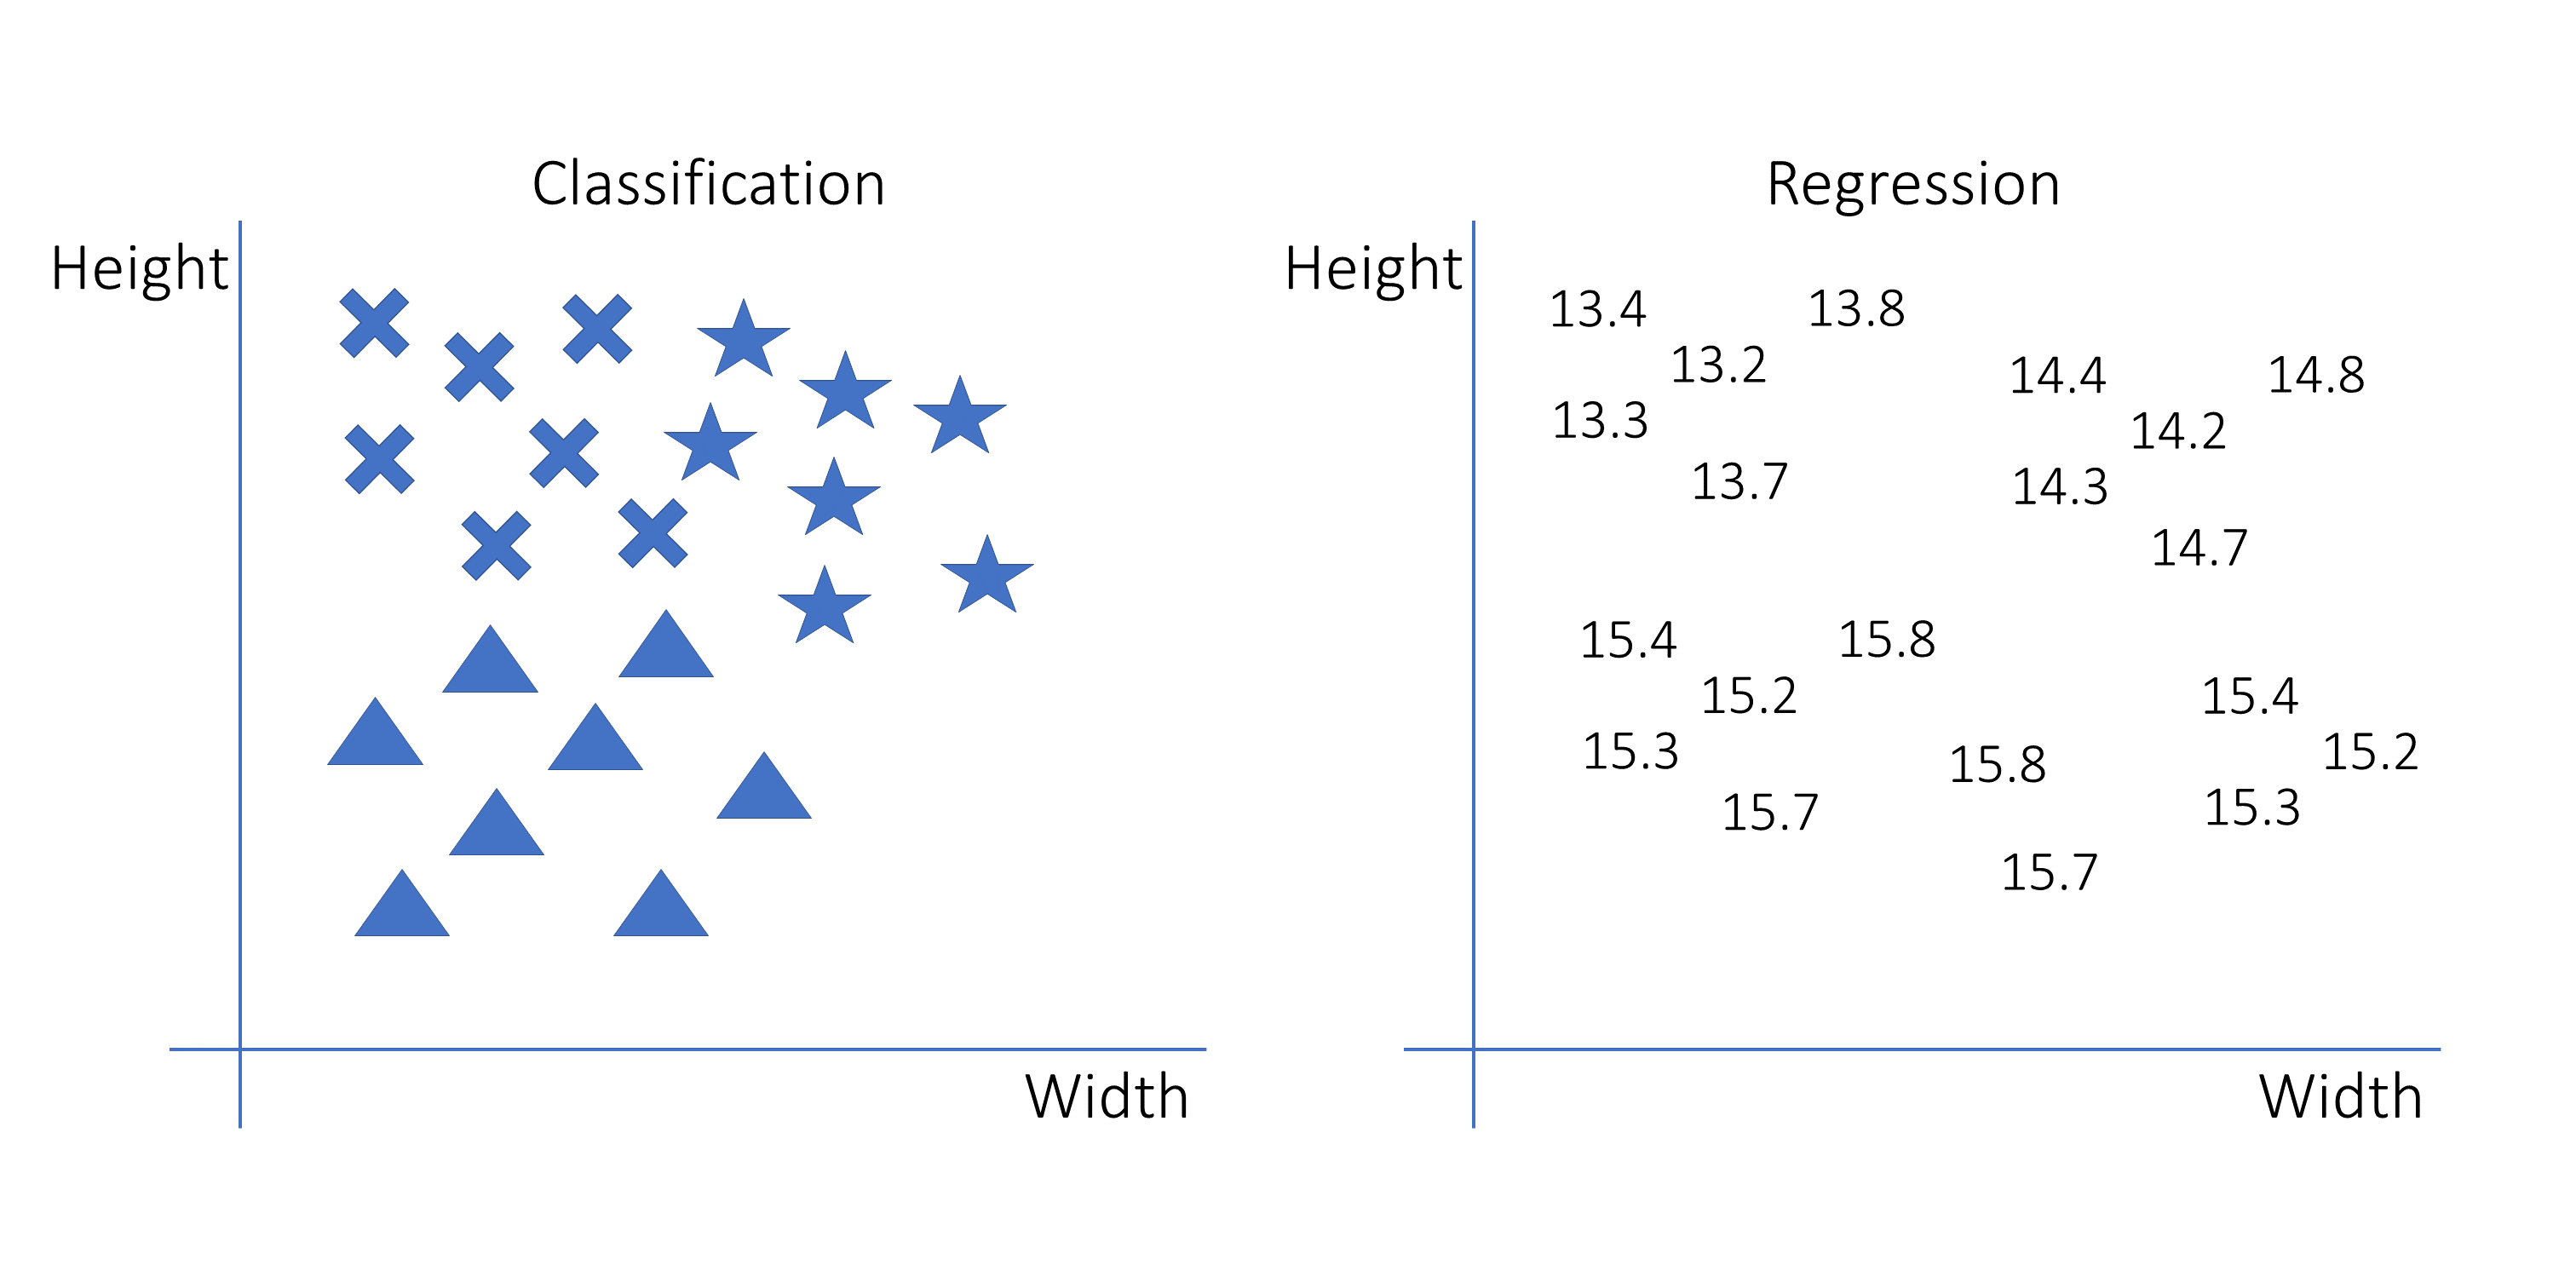

## Библиотечная реализация (2 подхода)

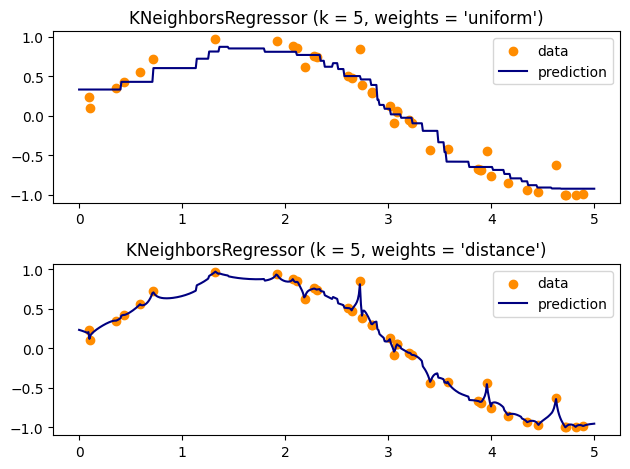

In [69]:
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## Реализация с нуля

По аналогии со случаем классификации реализуйте класс `MyKNNRegressor`. Подсказка: отличия будут только в методах `predict` и `predict_weighted`.

In [73]:
class MyKNNRegressor():

  def __init__(self, k=5, p=2):
    self.k = k
    self.p = p

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    return self

  def calulate_distances(self, X):
    return distance_matrix(X, self.X_train, self.p)

  def kneighbors(self, X):
    distances = self.calulate_distances(X)
    sorted_indices = np.argsort(distances, axis=1)
    neigh_ind_arr = sorted_indices[:, :self.k]
    neigh_dist_arr = np.take_along_axis(distances, neigh_ind_arr, axis=1)

    return neigh_dist_arr, neigh_ind_arr

  def predict(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.

    Что возвращается
    -------
    predictions : вектор предсказаний, как среднее
                  откликов ближайших соседей
    """
    neigh_dist_arr, neigh_ind_arr = self.kneighbors(X)
    nearest_labels = self.y_train[neigh_ind_arr]
    predictions = np.array([np.mean(labels) for labels in nearest_labels])
    return predictions

  def predict_weighted(self, X):
    """
    Параметры
    ----------
    X : {array-like} формы (n_samples, n_features)
        Матрица объекты/признаки, где `n_samples` — число объектов
        и `n_features` — число признаков.

    Что возвращается
    -------
    predictions : вектор предсказаний, как взвешенное среднее
                  откликов ближайших соседей
    """
    neigh_dist_arr, neigh_ind_arr = self.kneighbors(X)
    neigh_dist_arr[neigh_dist_arr==0] = 1e-32
    weights = 1 / neigh_dist_arr
    nearest_labels = self.y_train[neigh_ind_arr]
    probs = np.zeros((X.shape[0], 2))

    for i, (distance, indx) in enumerate(zip(neigh_dist_arr, neigh_ind_arr)):
      neigh_labels = self.y_train[indx.astype(int)]
      for cls in range(len(np.unique(self.y_train))):
        probs[i, cls] = np.sum(weights[i][neigh_labels == cls])

    probs = probs/probs.sum(axis=1, keepdims=True)

    predictions = np.argmax(probs, axis=1)

    return predictions


my_knn_regressor = MyKNNRegressor(k=5)

assert np.isclose(my_knn_regressor.fit(X, y).predict(T)[[10,50,100,150,200,250,300,350,400,450]], np.array([ 0.3324959 ,  0.42961896,  0.60331515,  0.85162378,  0.80942182, 0.66571157,  0.08938746, -0.33361809, -0.64616623, -0.90567895])).all()
assert np.isclose(my_knn_regressor.fit(X, y).predict_weighted(T)[[10,50,100,150,200,250,300,350,400,450]], np.array([ 0.1196656 ,  0.46085338,  0.66178095,  0.89646745,  0.84691512, 0.6248188 ,  0.10100713, -0.37534031, -0.6893501 , -0.90480353])).all()

IndexError: index 2 is out of bounds for axis 1 with size 2

Сравним с библиотечной реализацией

IndexError: index 2 is out of bounds for axis 1 with size 2

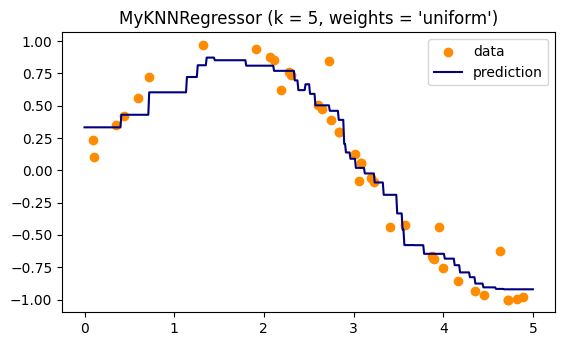

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)

my_knn_regressor = MyKNNRegressor(k=5)
y_ = my_knn_regressor.fit(X, y).predict(T)
plt.subplot(2, 2, 1)
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("MyKNNRegressor (k = 5, weights = 'uniform')")
y_ = my_knn_regressor.predict_weighted(T)
plt.subplot(2, 2, 3)
plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("MyKNNRegressor (k = 5, weights = 'weighted')")


for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 2, i*2 + 2)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

# Пример k-NN регрессии на реальных данных

Возьмем датасет, содержащий информацию об автомобилях. Датасет предварительно обработан (произведена очистка и заполнение пропусков). Предсказывать будем цену авто (колонка `price`).

In [78]:
!gdown 1SSJzRZFspUS8Fa9G1Wz7yVtS8sZyWbcH

Downloading...
From: https://drive.google.com/uc?id=1SSJzRZFspUS8Fa9G1Wz7yVtS8sZyWbcH
To: /Users/tryadovoi/Desktop/itmo/yadro_school/math_dir/practice_11/automobiles_clean.csv
100%|██████████████████████████████████████| 28.6k/28.6k [00:00<00:00, 26.2MB/s]


In [79]:
df = pd.read_csv('./automobiles_clean.csv')
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,...,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,...,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,...,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,...,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


Отделим предикторы от откликов

In [80]:
y = df[['price']]
X = df.drop(['price'], axis=1)

Возьмем маску по категориальным и непрерывным признакам набора данных

In [81]:
cat_mask = X.dtypes.values==object

In [82]:
X_cat = X[X.columns[cat_mask]]
X_cat

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [83]:
X_not_cat = X[X.columns[~cat_mask]]
X_not_cat

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


## Dummies

Произведем one-hot кодирование категориальных признаков и добавим некатегориальные

In [84]:
X_cat_dum = pd.get_dummies(X_cat, drop_first=True)
X_final_dum = pd.concat([X_cat_dum, X_not_cat], axis=1)
X_final_dum

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,False,False,False,False,False,False,False,False,False,False,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,False,False,False,False,False,False,False,False,False,False,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,False,False,False,False,False,False,False,False,False,False,...,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,True,False,False,False,False,False,False,False,False,False,...,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,True,False,False,False,False,False,False,False,False,False,...,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
197,False,False,False,False,False,False,False,False,False,False,...,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
198,False,False,False,False,False,False,False,False,False,False,...,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
199,False,False,False,False,False,False,False,False,False,False,...,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


Получили 64 признака. О чем стоит задуматься? Масштабируем, разбиваем, обучаем, оцениваем

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_final_dum_scaled = pd.DataFrame(scaler.fit_transform(X_final_dum), columns=X_final_dum.columns)

X_train, X_test, y_train, y_test = train_test_split(X_final_dum_scaled, y, test_size=0.2, random_state=10)

neigh_reg = KNeighborsRegressor(weights='distance').fit(X_train, y_train)
mean_absolute_error(y_test, neigh_reg.predict(X_test))

1889.9854731886962

А что там с проклятием размерностей? Может быть не стоит формировать так много признаков?

## Toy example

Рассмотрим список номинантов на премию "Золотой мяч" за 2016-2018 годы.

In [87]:
data = '''Person,Win
Ronaldo,1
Messi,0
Grizmann,0
Ronaldo,1
Messi,0
Neymar,0
Messi,1
van Dijk,0
Ronaldo,0
'''
df = pd.read_csv(io.StringIO(data))
df

,Person,Win
0,Ronaldo,1
1,Messi,0
2,Grizmann,0
3,Ronaldo,1
4,Messi,0
5,Neymar,0
6,Messi,1
7,van Dijk,0
8,Ronaldo,0


Поробуем заменить значения категориальных признаков на оценку вероятности получить награду на основе имеющейся статистики.

Cristiano Ronaldo побеждал в двух случаях из трех, когда был номинирован Messi в одном случае из трех и так далее...

In [88]:
# Частоты побед
wins_dict = dict(df.groupby('Person').sum()['Win'])
wins_dict

{'Grizmann': np.int64(0),
 'Messi': np.int64(1),
 'Neymar': np.int64(0),
 'Ronaldo': np.int64(2),
 'van Dijk': np.int64(0)}

In [89]:
# Общие частоты
noms_dict = dict(df['Person'].value_counts())
noms_dict

{'Ronaldo': np.int64(3),
 'Messi': np.int64(3),
 'Grizmann': np.int64(1),
 'Neymar': np.int64(1),
 'van Dijk': np.int64(1)}

In [ ]:
df['Win_prob'] = df.Person.apply(lambda x: wins_dict[x]/noms_dict[x])
df

,Person,Win,Win_prob
0,Ronaldo,1,0.666667
1,Messi,0,0.333333
2,Grizmann,0,0.000000
3,Ronaldo,1,0.666667
4,Messi,0,0.333333
5,Neymar,0,0.000000
6,Messi,1,0.333333
7,van Dijk,0,0.000000
8,Ronaldo,0,0.666667


Если ты Neymar, Grizmann или van Dijk, то получить награду не можешь -- это правило? Дадим бедолагам шанс и рассмотрим следующий подход.

## Target Encoder

Пусть решается задача бинарной классификации: $Y\in \{0,1\}$. Пусть также $X$ — некоторый категориальный признак, $X_i$ — конкретная категория. Идея заключается в том, чтобы поставить в соответствие категории $X_i$ некоторое число $S_i$, такое что

$$
S_i = \mathsf{P}(Y=1|X=X_i).
$$

В качестве оценки такой вероятности можно рассматривать величину
$$
\hat{S_i} = \frac{n_{iY}}{n_i},
$$

где $n_{iY}$ — число наблюдений категории $X_i$, для которых $Y=1$, $n_i$ — общее число наблюдений категории $X_i$.

При малых значениях $n_i$ рассматриваемае оценка будет ненадежной, поэтому для смягчения этого эффекта предлагается оценивать $S_i$ как смесь двух вероятностей: апостериорной вероятности на основе частот и априорной вероятности того, что $Y=1$, вычисленной на всем наборе данных, то есть

$$
\hat{S_i} = \lambda(n_i)\frac{n_{iY}}{n_i} + (1 - \lambda(n_i))\frac{n_{Y}}{n},
$$

где $n_Y$ — общее число объектов, для которых $Y=1$, $n$ — общее число объектов.

В качестве $\lambda(n)$ имеет смысл брать некоторую функцию, принимающую значения из отрезка $[0,1]$, например, на эту роль подойдет сигмоида, то есть

$$
\lambda(n) = \frac{1}{1+e^{-\frac{n-k}{f}}}.
$$

Параметр $k$ определяет половину минимального размера выборки для которого мы полностью "доверяем" оценке на основе частот. Параметр $f$ контролирует скорость "перехода" между апостериорной и априорной вероятностями: в случае $f\rightarrow 0$ функция $\lambda(n)$ принимает значения $1$ или $0$ и определяет использование только одной компоненты (апостериорной или априорной).

Подробности можно почитать [в статье,](https://dl.acm.org/citation.cfm?id=507538) там же описан случай, когда отклик -- непрерывная переменная


Рассмотрим некоторые ситуации

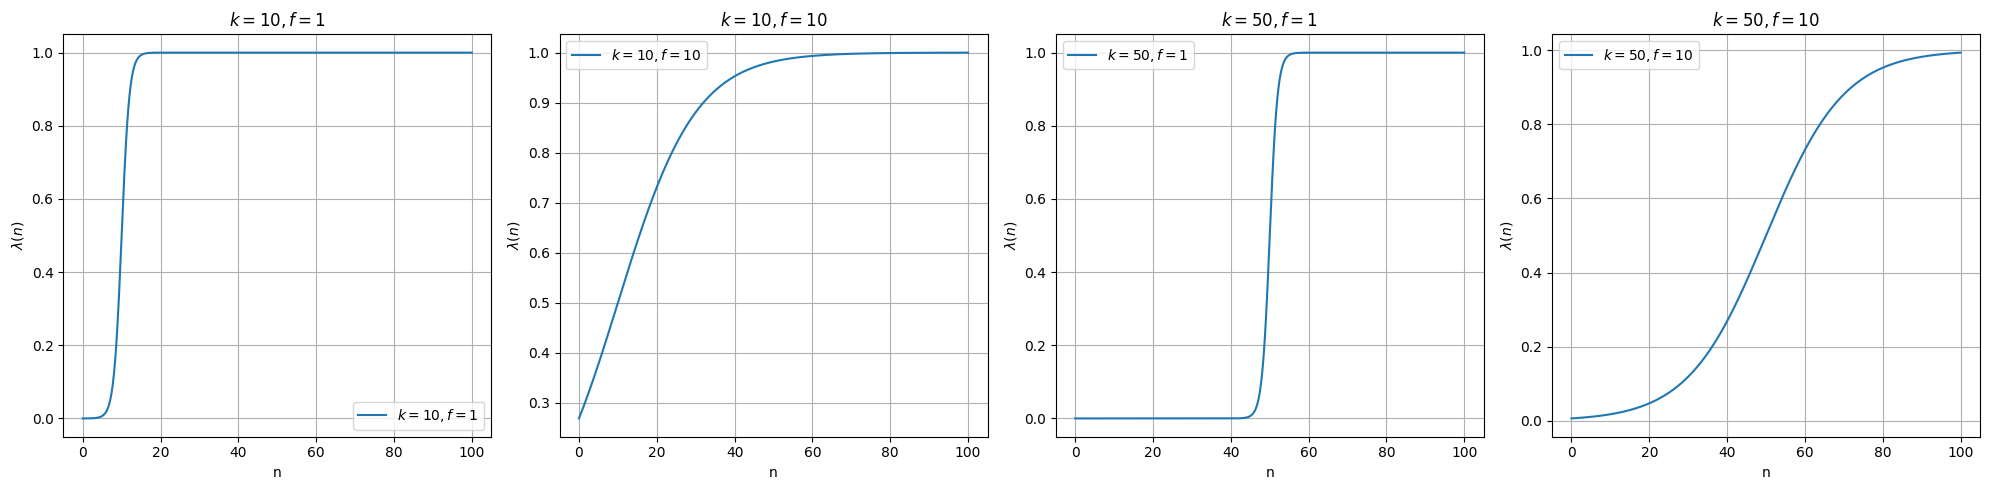

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления lambda(n)
def lambda_function(n, k, f):
    return 1 / (1 + np.exp(-(n - k) / f))

# Диапазон значений n
n_values = np.linspace(0, 100, 1000)

# Гиперпараметры для каждого случая
cases = [
    {"k": 10, "f": 1, "label": r"$k=10, f=1$"},
    {"k": 10, "f": 10, "label": r"$k=10, f=10$"},
    {"k": 50, "f": 1, "label": r"$k=50, f=1$"},
    {"k": 50, "f": 10, "label": r"$k=50, f=10$"}
]

# Создание графика
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Построение графиков для каждого случая
for i, case in enumerate(cases):
    k = case["k"]
    f = case["f"]
    label = case["label"]

    # Вычисление значений lambda(n)
    lambda_values = lambda_function(n_values, k, f)

    # Построение графика
    axs[i].plot(n_values, lambda_values, label=label)
    axs[i].set_title(label)
    axs[i].set_xlabel("n")
    axs[i].set_ylabel(r"$\lambda(n)$")
    axs[i].legend()
    axs[i].grid(True)

# Отображение графика
plt.tight_layout()
plt.show()

Вернемся к примеру с футболистами

In [ ]:
df = df.rename(columns={'Win_prob':'Win_prob_posterior'})
df

,Person,Win,Win_prob_posterior
0,Ronaldo,1,0.666667
1,Messi,0,0.333333
2,Grizmann,0,0.000000
3,Ronaldo,1,0.666667
4,Messi,0,0.333333
5,Neymar,0,0.000000
6,Messi,1,0.333333
7,van Dijk,0,0.000000
8,Ronaldo,0,0.666667


In [ ]:
# prior prob
win_prob = len(df[df['Win']==1])/len(df)
win_prob

0.3333333333333333

In [ ]:
df['Win_prob_prior'] = win_prob
df

,Person,Win,Win_prob_posterior,Win_prob_prior
0,Ronaldo,1,0.666667,0.333333
1,Messi,0,0.333333,0.333333
2,Grizmann,0,0.000000,0.333333
3,Ronaldo,1,0.666667,0.333333
4,Messi,0,0.333333,0.333333
5,Neymar,0,0.000000,0.333333
6,Messi,1,0.333333,0.333333
7,van Dijk,0,0.000000,0.333333
8,Ronaldo,0,0.666667,0.333333


In [ ]:
import numpy as np
from scipy.special import expit

k = 20
f = 10
n = len(df)

def lmbd(k,f,n):
  return 1 / (1 + np.exp(-(n-k)/f))


df['TE_manual'] = df.Person.apply(lambda x: lmbd(k,f, noms_dict[x]) * wins_dict[x]/noms_dict[x] + (1 - lmbd(k,f, noms_dict[x])) * win_prob)
df

,Person,Win,Win_prob_posterior,Win_prob_prior,TE_manual
0,Ronaldo,1,0.666667,0.333333,0.384822
1,Messi,0,0.333333,0.333333,0.333333
2,Grizmann,0,0.000000,0.333333,0.289964
3,Ronaldo,1,0.666667,0.333333,0.384822
4,Messi,0,0.333333,0.333333,0.333333
5,Neymar,0,0.000000,0.333333,0.289964
6,Messi,1,0.333333,0.333333,0.333333
7,van Dijk,0,0.000000,0.333333,0.289964
8,Ronaldo,0,0.666667,0.333333,0.384822


## Target Encoder (библиотека)

Попробуем воспользоваться библиотекой <a href = "https://contrib.scikit-learn.org/category_encoders/"><code>category_encoders</code></a> (<code>TargetEncoder</code>) для нашей задачи про автомобили

In [ ]:
!pip install -q category_encoders
import category_encoders as ce
df_lib = df[['Person', 'Win']]
te = ce.target_encoder.TargetEncoder(cols=df_lib[['Person']], min_samples_leaf=20, smoothing=10)
X_cat_ce = te.fit_transform(df_lib[['Person']], df_lib['Win'])
df['TE_lib'] = X_cat_ce
df

,Person,Win,Win_prob_posterior,Win_prob_prior,TE_manual,TE_lib
0,Ronaldo,1,0.666667,0.333333,0.384822,0.384822
1,Messi,0,0.333333,0.333333,0.333333,0.333333
2,Grizmann,0,0.000000,0.333333,0.289964,0.289964
3,Ronaldo,1,0.666667,0.333333,0.384822,0.384822
4,Messi,0,0.333333,0.333333,0.333333,0.333333
5,Neymar,0,0.000000,0.333333,0.289964,0.289964
6,Messi,1,0.333333,0.333333,0.333333,0.333333
7,van Dijk,0,0.000000,0.333333,0.289964,0.289964
8,Ronaldo,0,0.666667,0.333333,0.384822,0.384822


## Возвращаемся к автомобилям

In [ ]:
te = ce.target_encoder.TargetEncoder(cols=X_cat.columns)
X_cat_ce = te.fit_transform(X_cat, y)
X_final_ce = pd.concat([X_cat_ce, X_not_cat], axis=1)
X_final_ce

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,13561.040783,12916.408869,12542.182154,12818.656373,14924.839969,19730.951961,12884.085865,14729.133700,10303.200712,17601.860261,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,13561.040783,12916.408869,12542.182154,12818.656373,14924.839969,19730.951961,12884.085865,14729.133700,10303.200712,17601.860261,...,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,13561.040783,12916.408869,12542.182154,12818.656373,9983.966987,19730.951961,12884.085865,17152.793253,19472.218493,17601.860261,...,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,14127.377285,12916.408869,12542.182154,13565.639790,14458.990116,9244.999367,12884.085865,11567.364732,10303.200712,17601.860261,...,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,14127.377285,12916.408869,12542.182154,13565.639790,14458.990116,12520.543919,12884.085865,11567.364732,15573.940438,17601.860261,...,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,14610.773734,12916.408869,12542.182154,13565.639790,14458.990116,19730.951961,12884.085865,11567.364732,10303.200712,17601.860261,...,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
197,14610.773734,12916.408869,15742.851986,13565.639790,14458.990116,19730.951961,12884.085865,11567.364732,10303.200712,17601.860261,...,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
198,14610.773734,12916.408869,12542.182154,13565.639790,14458.990116,19730.951961,12884.085865,17152.793253,19472.218493,17601.860261,...,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
199,14610.773734,14522.639677,15742.851986,13565.639790,14458.990116,19730.951961,12884.085865,11567.364732,19472.218493,14522.639677,...,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


Масштабируем числовые признаки

In [ ]:
scaler = StandardScaler()
X_final_ce_scaled = pd.DataFrame(scaler.fit_transform(X_final_ce), columns=X_final_ce.columns)
X_final_ce_scaled

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.460899,-0.332411,-0.467099,-1.125811,1.032069,1.285785,-0.123091,1.476381,-0.498305,0.948368,...,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
1,0.460899,-0.332411,-0.467099,-1.125811,1.032069,1.285785,-0.123091,1.476381,-0.498305,0.948368,...,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
2,0.460899,-0.332411,-0.467099,-1.125811,-1.336248,1.285785,-0.123091,3.019912,2.363898,0.948368,...,-0.559713,0.518080,0.606234,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386
3,0.767504,-0.332411,-0.467099,0.882083,0.808772,-0.806852,-0.123091,-0.537221,-0.498305,0.948368,...,0.218425,-0.423766,-0.431327,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993
4,0.767504,-0.332411,-0.467099,0.882083,0.808772,-0.153166,-0.123091,-0.537221,1.147010,0.948368,...,0.218425,0.520017,0.220165,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.029207,-0.332411,-0.467099,0.882083,0.808772,1.285785,-0.123091,-0.537221,-0.498305,0.948368,...,0.709881,0.768075,0.340812,1.680188,-0.339096,-0.166278,0.284473,0.592155,-0.340101,-0.395189
197,1.029207,-0.332411,2.140872,0.882083,0.808772,1.285785,-0.123091,-0.537221,-0.498305,0.948368,...,0.709881,0.956057,0.340812,1.680188,-0.339096,-0.366529,1.518625,0.382477,-0.964397,-0.836484
198,1.029207,-0.332411,-0.467099,0.882083,0.808772,1.285785,-0.123091,3.019912,2.363898,0.948368,...,0.709881,0.884353,1.112950,0.932257,-1.227251,-0.341497,0.821061,0.801833,-1.120471,-1.130681
199,1.029207,3.008322,2.140872,0.882083,0.808772,1.285785,-0.123091,-0.537221,2.363898,0.250861,...,0.709881,1.281633,0.437329,-1.199348,0.453899,3.212954,0.069837,-0.665911,0.128120,-0.542288


Разделяем данные и обучаем модель

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final_ce_scaled, y, test_size=0.2, random_state=10)

neigh_reg = KNeighborsRegressor(weights='distance').fit(X_train, y_train)
mean_absolute_error(y_test, neigh_reg.predict(X_test))

1505.8793582524845